In [23]:
import medmnist
import numpy as np
from medmnist import PneumoniaMNIST

In [24]:
#download_directory = '/Users/*****/Desktop/AMLS_23_24_SN22241679/Datasets'

#dataset1 = PneumoniaMNIST(split="train", root=download_directory,download=True)
#dataset2 = PneumoniaMNIST(split="val", root=download_directory,download=True)
#dataset3 = PneumoniaMNIST(split="test",root=download_directory,download=True)

In [25]:
data=np.load('pneumoniamnist.npz') # load the data

In [26]:
data.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
import platform
import pickle

In [28]:
Xray = data.files #save the data

#Put the data in each sets
x_train=np.array(data[Xray[0]])
x_val=np.array(data[Xray[1]])
x_test=np.array(data[Xray[2]])

y_train=np.array(data[Xray[3]])
y_val=np.array(data[Xray[4]])
y_test=np.array(data[Xray[5]])

In [29]:
print(x_train.shape) #check the shape to determine CNN input shape
print(x_val.shape)
print(x_test.shape)

(4708, 28, 28)
(524, 28, 28)
(624, 28, 28)


In [30]:
#Combine the data together
x = np.concatenate((x_train, x_val, x_test), axis=0)
y = np.concatenate((y_train, y_val, y_test), axis=0)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15) #split the data with test size 15%

In [32]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(y_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

y_train_flat = y_train.reshape(y_train.shape[0], -1)
y_val_flat = y_val.reshape(y_val.shape[0], -1)
y_test_flat = y_test.reshape(x_test.shape[0], -1)

In [33]:
print(x_train_flat.shape)

(4977, 784)


In [34]:
# Pre-process data
scaler = MinMaxScaler() # This estimator scales and translates each feature individually such that it is in the given range on the training set, default between(0,1)
x_train_flat = scaler.fit_transform(x_train_flat)
x_val_flat = scaler.transform(x_val_flat)
x_test_flat = scaler.transform(x_test_flat)

In [35]:
# sklearn functions implementation
def logRegrPredict(x_train, y_train,xtest):
    # Build Logistic Regression Model
    logreg = LogisticRegression(solver='lbfgs')
    # Train the model using the training sets
    logreg.fit(x_train, y_train)
    y_pred= logreg.predict(xtest)
    #print('Accuracy on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
    return y_pred

y_pred = logRegrPredict(x_train_flat, y_train_flat,x_test_flat)
print('Accuracy on test set: '+str(accuracy_score(y_test_flat,y_pred)))
print(classification_report(y_test_flat,y_pred))#text report showing the main classification metrics

/Users/jamesso/anaconda3/envs/Labs/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on test set: 0.9510807736063709
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       239
           1       0.97      0.97      0.97       640

    accuracy                           0.95       879
   macro avg       0.94      0.94      0.94       879
weighted avg       0.95      0.95      0.95       879



/Users/jamesso/anaconda3/envs/Labs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
model=Sequential()

# Feature Learning Layers
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())#Prepare for classification

#Classification Layers
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#Check system os for optimisation in execution
if platform.system() == "Darwin" and platform.processor() == "arm":
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
else:
    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
32/32 [==============================] - 1s 21ms/step - loss: 0.7847 - accuracy: 0.7669 - val_loss: 0.2463 - val_accuracy: 0.8916
Epoch 2/30
32/32 [==============================] - 1s 19ms/step - loss: 0.2171 - accuracy: 0.9151 - val_loss: 0.1876 - val_accuracy: 0.9197
Epoch 3/30
32/32 [==============================] - 1s 20ms/step - loss: 0.2064 - accuracy: 0.9159 - val_loss: 0.2129 - val_accuracy: 0.9247
Epoch 4/30
32/32 [==============================] - 1s 20ms/step - loss: 0.1805 - accuracy: 0.9297 - val_loss: 0.2019 - val_accuracy: 0.9167
Epoch 5/30
32/32 [==============================] - 1s 20ms/step - loss: 0.1605 - accuracy: 0.9405 - val_loss: 0.2015 - val_accuracy: 0.9247
Epoch 6/30
32/32 [==============================] - 1s 19ms/step - loss: 0.1632 - accuracy: 0.9395 - val_loss: 0.1775 - val_accuracy: 0.9347
Epoch 7/30
32/32 [==============================] - 1s 21ms/step - loss: 0.1447 - accuracy: 0.9457 - val_loss: 0.1540 - val_accuracy: 0.9468
Epoch 8/30
32

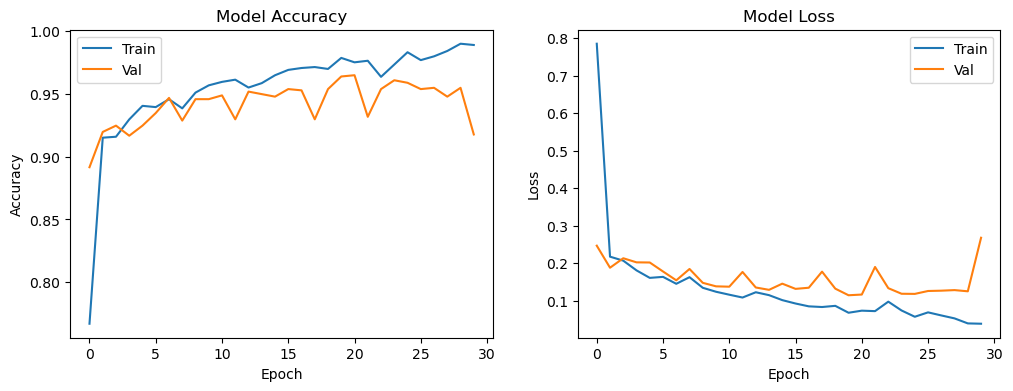

In [37]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.show()

In [38]:
ypred = model.predict(x_test)

28/28 [==============================] - 0s 3ms/step


In [39]:
Ypred=np.zeros(len(ypred))
for i in range(len(ypred)):
    if ypred[i]>=0.5:
        Ypred[i]=1
    else:
        Ypred[i]=0

In [40]:
accuracy_score(y_test,Ypred) #accuracy score

0.9522184300341296

In [41]:
# save the binary classification model as a pickle file
model_pkl_file = "binary_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)